In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader

In [2]:
t3d = torch.rand(10, 5, 3)
t3d_mean = torch.mean(t3d)

In [37]:
#we should use PyTorch's benchmark module, because it automatically synchronizes CUDA when benchmarking on the GPU
import torch.utils.benchmark as benchmark

gpu = torch.device("cuda")

log2_sizes = range(1, 13)
results = []
cpu_times = []
gpu_times = []

for i in log2_sizes:
    print(i)
    x = torch.rand(2**i, 2**i, dtype=torch.float32)
    x_cpu = x.cpu()
    b_cpu = benchmark.Timer(stmt="x_cpu@x_cpu", globals = {"x_cpu": x_cpu}, label="CPU", sub_label=f"Size: {2**i}", description="Matrix multiply")
    r_cpu = b_cpu.blocked_autorange()
    x_gpu = x.to(gpu)
    b_gpu = benchmark.Timer(stmt="x_gpu@x_gpu", globals = {"x_gpu": x_gpu}, label="GPU", sub_label=f"Size: {2**i}", description="Matrix multiply")
    r_gpu = b_gpu.blocked_autorange()
    results.append(r_cpu)
    results.append(r_gpu)
    cpu_times.append(r_cpu.median)
    gpu_times.append(r_gpu.median)

compare = benchmark.Compare(results)
compare.print()

1
2
3
4
5
6
7
8
9
10
11
12
[-------------- CPU ---------------]
                  |  Matrix multiply
1 threads: -------------------------
      Size: 2     |           1.8   
      Size: 4     |           1.8   
      Size: 8     |           2.0   
      Size: 16    |           2.2   
      Size: 32    |           3.9   
      Size: 64    |          15.4   
      Size: 128   |         117.6   
      Size: 256   |         878.2   
      Size: 512   |        6933.8   
      Size: 1024  |       56322.9   
      Size: 2048  |      446585.9   
      Size: 4096  |     3577841.0   

Times are in microseconds (us).

[-------------- GPU ---------------]
                  |  Matrix multiply
1 threads: -------------------------
      Size: 2     |         16.0    
      Size: 4     |         16.7    
      Size: 8     |         17.1    
      Size: 16    |         16.3    
      Size: 32    |         16.6    
      Size: 64    |         16.3    
      Size: 128   |         16.8    
      Size: 25

Text(0, 0.5, 't (us)')

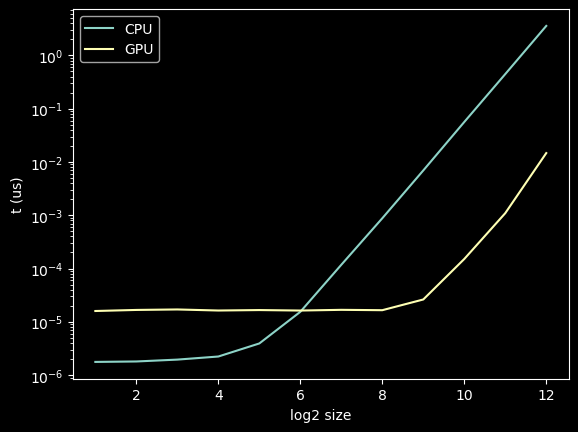

In [51]:
fig = plt.figure()
ax = fig.subplots()
cpu_line = ax.plot(log2_sizes, cpu_times, label = "CPU")
gpu_line = ax.plot(log2_sizes, gpu_times, label = "GPU")
ax.set_yscale('log')
ax.legend()
ax.set_xlabel('log2 size')
ax.set_ylabel('t (us)')